In [1]:
#Output variable -> y
#y -> Whether the client has subscribed a term deposit or not 
#Binomial ("yes" or "no")

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

In [3]:
bank = pd.read_csv("../Assignment 6-Logistic Regression/bank-full.csv",sep=";")
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
bank.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [5]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [7]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [8]:
bank=bank[['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact',
             'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']]

In [9]:
#cpnvert y as numeric
le=LabelEncoder()
bank["y"]=le.fit_transform(bank["y"])

In [10]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


In [11]:
cc=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
for column in cc:
    bank[column]=le.fit_transform(bank[column])

In [12]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


In [13]:
x=bank.drop("y",axis=1)
y=bank["y"]

In [14]:
x.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3


In [15]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int32

In [16]:
import warnings
warnings.filterwarnings('ignore')

### Create the Model

In [63]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((36168, 16), (9043, 16), (36168,), (9043,))

# Logistic Regression Model

In [18]:
#create the model
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [19]:
## Predict the data for train
y_predt_train=model.predict(X_train)
y_predt_train

array([0, 0, 0, ..., 0, 0, 0])

In [20]:
## Predict the data for test
y_predt=model.predict(X_test)
y_predt

array([0, 0, 0, ..., 0, 0, 0])

In [21]:
#confusion matrix for training data
train_cm = confusion_matrix(y_train,y_predt_train)
train_cm

array([[31387,   583],
       [ 3456,   742]], dtype=int64)

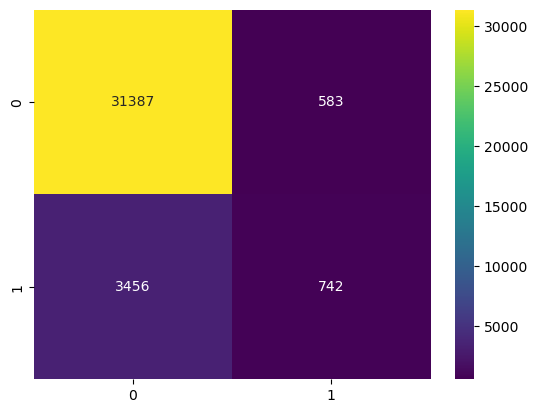

In [22]:
#heat map to presentation purpose
sns.heatmap(train_cm, annot=True, fmt='d',cmap='viridis')
plt.show()

In [23]:
print(classification_report(y_train,y_predt_train))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     31970
           1       0.56      0.18      0.27      4198

    accuracy                           0.89     36168
   macro avg       0.73      0.58      0.60     36168
weighted avg       0.86      0.89      0.86     36168



# LASSO regression

In [65]:
from sklearn.preprocessing import StandardScaler

In [66]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [70]:
# Perform LASSO regression
lasso_model = LogisticRegression(penalty='l1', solver='liblinear', fit_intercept=True)
lasso_model.fit(X_train_scaled, y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [73]:
# Get selected features (non-zero coefficients)
intercept = lasso_model.intercept_[0]
coefs = lasso_model.coef_[0]
selected_features = [X.columns[i] for i in range(len(coefs)) if coefs[i] != 0]

In [74]:
# Print selected features
selected_features.append('intercept')
print("Selected Features:", selected_features)

Selected Features: ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'intercept']


In [75]:
# Evaluate the model
train_accuracy = lasso_model.score(X_train_scaled, y_train)
test_accuracy = lasso_model.score(X_test_scaled, y_test)
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Train Accuracy: 0.8916998451669984
Test Accuracy: 0.8878690699988941


In [24]:
from sklearn.metrics import roc_curve,auc, roc_auc_score

In [25]:
model.predict_proba(X_train)

array([[0.96588218, 0.03411782],
       [0.93038504, 0.06961496],
       [0.96949831, 0.03050169],
       ...,
       [0.87125072, 0.12874928],
       [0.93286708, 0.06713292],
       [0.99637784, 0.00362216]])

In [26]:
proba_true = model.predict_proba(X_train)[:,1]
proba_true

array([0.03411782, 0.06961496, 0.03050169, ..., 0.12874928, 0.06713292,
       0.00362216])

In [27]:
fpr,tpr,threshold = roc_curve(y_train,proba_true)
auc = roc_auc_score(y_train,y_predt_train)
auc

0.5792574938123118

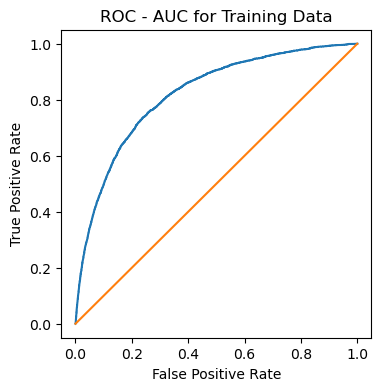

In [28]:
# Plot the graph of ROC AUC
plt.figure(figsize=(4,4))
plt.title('ROC - AUC for Training Data')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1])
plt.show()

In [29]:
#confusion matrix for testing data
test_cm = confusion_matrix(y_test,y_predt)
test_cm

array([[7804,  148],
       [ 900,  191]], dtype=int64)

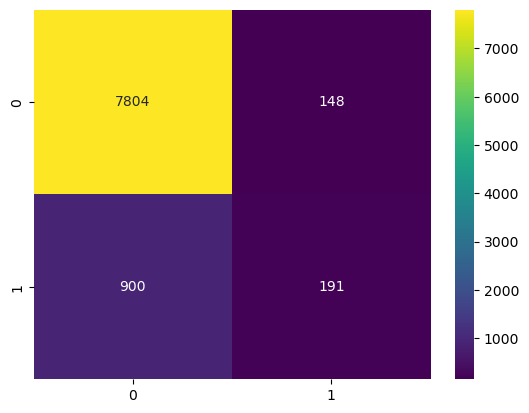

In [30]:
#heat map to presentation purpose
sns.heatmap(test_cm, annot=True, fmt='d',cmap='viridis')
plt.show()

In [31]:
print(classification_report(y_test,y_predt))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7952
           1       0.56      0.18      0.27      1091

    accuracy                           0.88      9043
   macro avg       0.73      0.58      0.60      9043
weighted avg       0.86      0.88      0.86      9043



In [32]:
model.predict_proba(X_test)

array([[0.95004436, 0.04995564],
       [0.96223998, 0.03776002],
       [0.82263339, 0.17736661],
       ...,
       [0.96346847, 0.03653153],
       [0.96430379, 0.03569621],
       [0.94234524, 0.05765476]])

In [33]:
proba_true = model.predict_proba(X_test)[:,1]
proba_true

array([0.04995564, 0.03776002, 0.17736661, ..., 0.03653153, 0.03569621,
       0.05765476])

In [34]:
# Testing data
t_fpr,t_tpr,t_threshold = roc_curve(y_test,proba_true)
auc = roc_auc_score(y_test,y_predt)
auc

0.5782285371255951

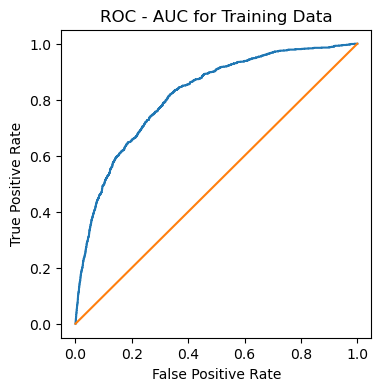

In [35]:
# Plot the graph of ROC AUC
plt.figure(figsize=(4,4))
plt.title('ROC - AUC for Training Data')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(t_fpr,t_tpr)
plt.plot([0,1],[0,1])
plt.show()

In [36]:
#visualization the results
coefficients = model.coef_[0]
feature_names = x.columns

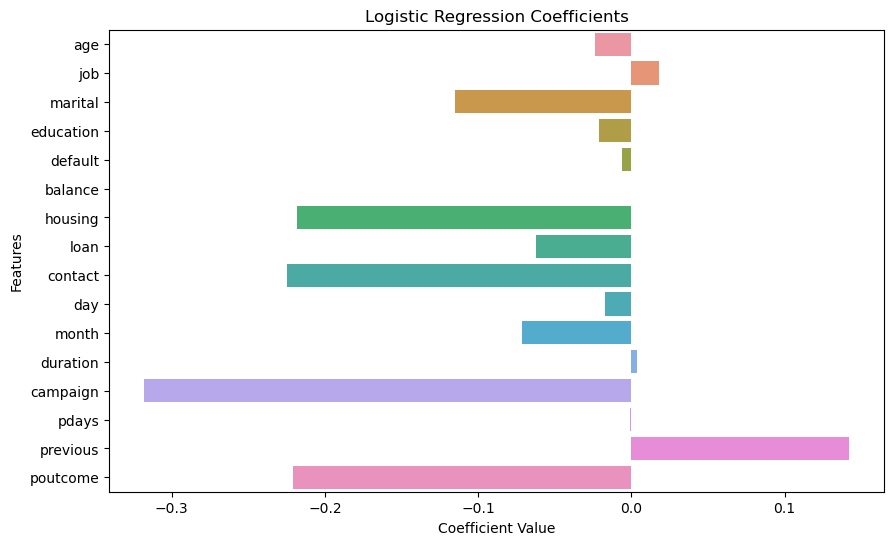

In [37]:
plt.figure(figsize=(10, 6))
sns.barplot(x=coefficients, y=feature_names)
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.title('Logistic Regression Coefficients')
plt.show()

In [39]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Load data
data = bank.copy()
# Convert categorical variables to dummy variables
data = pd.get_dummies(data, drop_first=True)

In [40]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,1
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,1
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2,1
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3,0


In [52]:
# Add intercept term
data['intercept'] = 1

# Define predictor and target variables
X = data.drop(columns=['y'])
y = data['y']

# Backward Elimination

In [53]:
# Backward Elimination
def backward_elimination(X, y):
    cols = list(X.columns)
    pmax = 1
    while len(cols) > 0:
        p = []
        X_1 = X[cols]
        X_1 = sm.add_constant(X_1)
        model = sm.Logit(y, X_1).fit()
        p_values = list(model.pvalues)[1:]  # Exclude intercept
        column_p_values = list(zip(cols, p_values))
        max_p_value = max(p_values)
        if max_p_value > 0.05:
            feature_to_remove = [col for col, p_val in column_p_values if p_val == max_p_value][0]
            cols.remove(feature_to_remove)
        else:
            break
    selected_features_BE = cols
    return selected_features_BE

In [54]:
selected_features = backward_elimination(X, y)

Optimization terminated successfully.
         Current function value: 0.267322
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.267596
         Iterations 8


In [55]:
# Fit final model with selected features
final_model = sm.Logit(y, sm.add_constant(X[selected_features])).fit()

Optimization terminated successfully.
         Current function value: 0.267596
         Iterations 8


In [56]:
# Print summary
print(final_model.summary())


                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                45211
Model:                          Logit   Df Residuals:                    45195
Method:                           MLE   Df Model:                           15
Date:                Sun, 21 Apr 2024   Pseudo R-squ.:                  0.2585
Time:                        17:40:34   Log-Likelihood:                -12098.
converged:                       True   LL-Null:                       -16315.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
job            0.0088      0.005      1.645      0.100      -0.002       0.019
marital        0.1545      0.028      5.597      0.000       0.100       0.209
education      0.1879      0.023      8.154      0.0

In [57]:
# Get AIC and BIC
aic = final_model.aic
bic = final_model.bic
print("AIC:", aic)
print("BIC:", bic)


AIC: 24228.544800200143
BIC: 24368.05033138485


# Forward Selection

In [58]:
# Forward Selection
def forward_selection(X, y):
    cols = list(X.columns)
    selected_cols = []
    while len(cols) > 0:
        remaining_cols = list(set(cols) - set(selected_cols))
        best_pval = 1
        best_col = None
        for col in remaining_cols:
            model = sm.Logit(y, sm.add_constant(X[selected_cols + [col]])).fit(disp=0)
            pval = model.pvalues[col]
            if pval < best_pval:
                best_pval = pval
                best_col = col
        if best_pval < 0.05:  # significance level
            selected_cols.append(best_col)
        else:
            break
    return selected_cols

In [59]:
selected_features = forward_selection(X, y)

In [60]:
# Fit final model with selected features
Forward_final_model = sm.Logit(y, sm.add_constant(X[selected_features])).fit()

Optimization terminated successfully.
         Current function value: 0.267354
         Iterations 8


In [61]:
# Print summary
print(final_model.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                45211
Model:                          Logit   Df Residuals:                    45195
Method:                           MLE   Df Model:                           15
Date:                Sun, 21 Apr 2024   Pseudo R-squ.:                  0.2585
Time:                        17:41:50   Log-Likelihood:                -12098.
converged:                       True   LL-Null:                       -16315.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
job            0.0088      0.005      1.645      0.100      -0.002       0.019
marital        0.1545      0.028      5.597      0.000       0.100       0.209
education      0.1879      0.023      8.154      0.0

In [62]:
# Get AIC and BIC
aic = final_model.aic
bic = final_model.bic
print("AIC:", aic)
print("BIC:", bic)

AIC: 24228.544800200143
BIC: 24368.05033138485


In [76]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each predictor
vif_data = X.assign(intercept=1)  # Add an intercept term
vif_series = pd.Series([variance_inflation_factor(vif_data.values, i) 
                        for i in range(vif_data.shape[1])], 
                       index=vif_data.columns)

# Print VIF values
print("VIF values:")
print(vif_series)

VIF values:
age           1.279310
job           1.049332
marital       1.218279
education     1.066491
default       1.011706
balance       1.032463
housing       1.190106
loan          1.020907
contact       1.319594
day           1.039638
month         1.250628
duration      1.009757
campaign      1.057919
pdays         3.868474
previous      1.325780
poutcome      4.081133
intercept    87.287234
dtype: float64
